In [1]:
import os, csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# data loading

In [2]:
ipa_ratings = [file for file in os.listdir('tIJ_IPA/') if file[-3:] == 'txt']
print ipa_ratings

['rb_reviews_alesmith_ipa.txt', 'rb_reviews_ballastpoint_sculpin.txt', 'rb_reviews_bells_twohearted.txt', 'rb_reviews_lagunitas_ipa.txt', 'rb_reviews_russianriver_blindpig.txt', 'rb_reviews_stone_ipa.txt', 'rb_reviews_surly_furious.txt', 'rb_reviews_tij_ipa.txt', 'rb_reviews_troegs_nuggetnectar.txt']


In [3]:
d = {}

for ipa in ipa_ratings:
    ipa_file = 'tIJ_IPA/' + ipa
    ipa_name = (ipa.split('_')[2])
    with open(ipa_file, 'r') as f:
        next(f)
        temp_dict = {}
        for line in f:
            line = line.strip()
            key, val = line.split('\t')
            temp_dict[key] = float(val)

        d[ipa_name] = temp_dict
        
df_ipa = pd.DataFrame.from_dict(d)
print df_ipa.shape
df_ipa.head()

(7503, 9)


,alesmith,ballastpoint,bells,lagunitas,russianriver,stone,surly,tij,troegs
00cobraR,4.0,NaN,4.4,3.6,4.0,4.0,NaN,NaN,NaN
09maso3,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN
0o9i,4.3,3.5,NaN,3.7,4.1,4.4,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8
1010,NaN,NaN,4.2,NaN,NaN,3.7,NaN,NaN,NaN


# export

In [4]:
# df_ipa.to_csv('tIJ_IPA/ipa_listing.csv')

# dummy plots

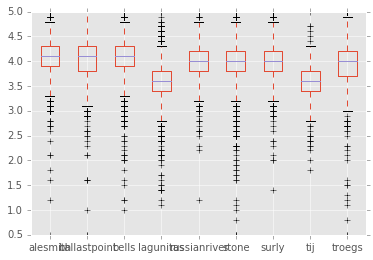

In [5]:
df_ipa.plot.box()

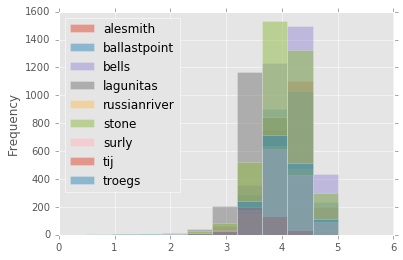

In [6]:
df_ipa.plot.hist(alpha=0.5)

# some investigation

In [7]:
df_ipa['ratings_cnt'] = df_ipa.notnull().sum(axis=1)

print df_ipa[df_ipa.ratings_cnt > 1].shape
df_ipa[df_ipa.ratings_cnt > 1].head()

(3950, 10)


,alesmith,ballastpoint,bells,lagunitas,russianriver,stone,surly,tij,troegs,ratings_cnt
00cobraR,4.0,NaN,4.4,3.6,4.0,4.0,NaN,NaN,NaN,5
0o9i,4.3,3.5,NaN,3.7,4.1,4.4,NaN,NaN,NaN,5
1010,NaN,NaN,4.2,NaN,NaN,3.7,NaN,NaN,NaN,2
11026,4.6,NaN,4.3,3.1,NaN,3.7,NaN,NaN,4.2,5
123456green,4.4,NaN,4.0,NaN,2.5,4.2,NaN,NaN,NaN,4


In [8]:
df_ipa[(df_ipa.ratings_cnt > 1) & (df_ipa.tij >= .1)].head()

,alesmith,ballastpoint,bells,lagunitas,russianriver,stone,surly,tij,troegs,ratings_cnt
20107589,3.7,NaN,NaN,3.6,NaN,NaN,NaN,3.9,NaN,3
77ships,4.1,4.4,4.6,NaN,NaN,3.8,NaN,3.6,NaN,5
Abijen,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.2,NaN,2
Abrakarl,NaN,4.1,NaN,3.6,NaN,4.4,NaN,2.5,NaN,4
Alengrin,4.3,4.0,4.3,3.8,NaN,4.4,NaN,3.4,4.1,7


In [9]:
# mean ratings of beers based on number of IPA's from collection rated
# i.e., some reviewers only rated 1 beer, others all 9
# i myself have had 8 of 9; missing 'surly'

df_ipa.groupby('ratings_cnt').mean()

,alesmith,ballastpoint,bells,lagunitas,russianriver,stone,surly,tij,troegs
ratings_cnt,,,,,,,,,
1,4.210861,4.151282,4.177386,3.605392,4.115741,4.062695,4.153600,3.661538,4.047393
2,4.096018,4.030769,4.074603,3.563295,4.036275,3.976417,4.004082,3.567308,4.040268
3,4.101384,4.023220,4.068182,3.601401,4.020472,3.976623,3.993893,3.652381,3.974719
4,4.064113,4.003957,4.035000,3.600968,3.984071,3.983088,3.970000,3.530769,3.935542
5,4.121935,4.032107,4.039316,3.608136,3.986061,3.943421,3.957051,3.510000,3.972283
6,4.048239,3.994094,3.977670,3.569796,3.967045,3.956902,3.985629,3.543333,3.925824
7,4.054967,4.032759,4.046497,3.574786,3.997665,3.907742,3.926860,3.434483,3.893361
8,4.051667,4.031333,4.038796,3.529866,3.966779,3.933110,3.963605,3.475000,3.903082
9,3.947826,3.847826,3.917391,3.530435,4.013043,3.791304,3.782609,3.395652,3.730435


# prep for MLE grid by first tallying and getting %'s of votes

In [10]:
ipa_comp = np.zeros(81).reshape(9,9)

for i in range(len(df_ipa.columns[:-1])):
    for j in range(len(df_ipa.columns[:-1])):
        # +1 for outright better rating
        ipa_comp[i][j] += np.sum(df_ipa.iloc[:, i] > df_ipa.iloc[:, j])
        # +0.5 for even score
        # makes more sense for "winning percentage"
        ipa_comp[i][j] += np.sum(df_ipa.iloc[:, i] == df_ipa.iloc[:, j])/2.0
    ipa_comp[i][i] = 0

print 'Post comparison tally:\n'
print ipa_comp

Post comparison tally:

[[    0.    680.5   803.   1040.5   561.   1004.    539.5   153.    605. ]
 [  594.5     0.    703.   1034.    497.5   930.5   479.5   149.    551.5]
 [  634.    724.      0.   1268.    530.   1191.5   620.5   121.    722. ]
 [  125.5   192.    202.      0.    106.5   294.5   108.     98.    165.5]
 [  362.    412.5   444.    673.5     0.    571.    378.5    73.5   429.5]
 [  578.    610.5   833.5  1399.5   424.      0.    442.    171.5   571.5]
 [  310.5   361.5   431.5   622.    295.5   504.      0.     58.    375. ]
 [   15.     28.     21.     69.      9.5    29.5    15.      0.      9. ]
 [  298.    333.5   429.    670.5   278.5   541.5   302.     41.      0. ]]


In [11]:
# number of head-to-head match ups
np.sum(ipa_comp)

31852.0

In [12]:
# number of reviewers
# obviously only counting reviewers with two or more IPA's rated
# info already available above but highlighting it here
np.sum(df_ipa.ratings_cnt > 1)

3950

In [13]:
ipa_perc = np.zeros(81).reshape(9,9)

for i in range(len(df_ipa.columns[:-1])):
    for j in range(len(df_ipa.columns[:-1])):
        try:
            ipa_perc[i][j] = ipa_comp[i][j]/float(ipa_comp[i][j] + ipa_comp[j][i])
        except:
            ipa_perc[i][j] = 0
        
print 'Post percentage calculation:\n'
print np.round_(ipa_perc, 4)

Post percentage calculation:

[[    nan  0.5337  0.5588  0.8924  0.6078  0.6346  0.6347  0.9107  0.67  ]
 [ 0.4663     nan  0.4926  0.8434  0.5467  0.6038  0.5702  0.8418  0.6232]
 [ 0.4412  0.5074     nan  0.8626  0.5441  0.5884  0.5898  0.8521  0.6273]
 [ 0.1076  0.1566  0.1374     nan  0.1365  0.1738  0.1479  0.5868  0.198 ]
 [ 0.3922  0.4533  0.4559  0.8635     nan  0.5739  0.5616  0.8855  0.6066]
 [ 0.3654  0.3962  0.4116  0.8262  0.4261     nan  0.4672  0.8532  0.5135]
 [ 0.3653  0.4298  0.4102  0.8521  0.4384  0.5328     nan  0.7945  0.5539]
 [ 0.0893  0.1582  0.1479  0.4132  0.1145  0.1468  0.2055     nan  0.18  ]
 [ 0.33    0.3768  0.3727  0.802   0.3934  0.4865  0.4461  0.82       nan]]


In [14]:
print df_ipa.columns[:-1].tolist()
print np.round_(ipa_perc, 3)

['alesmith', 'ballastpoint', 'bells', 'lagunitas', 'russianriver', 'stone', 'surly', 'tij', 'troegs']
[[   nan  0.534  0.559  0.892  0.608  0.635  0.635  0.911  0.67 ]
 [ 0.466    nan  0.493  0.843  0.547  0.604  0.57   0.842  0.623]
 [ 0.441  0.507    nan  0.863  0.544  0.588  0.59   0.852  0.627]
 [ 0.108  0.157  0.137    nan  0.137  0.174  0.148  0.587  0.198]
 [ 0.392  0.453  0.456  0.863    nan  0.574  0.562  0.886  0.607]
 [ 0.365  0.396  0.412  0.826  0.426    nan  0.467  0.853  0.513]
 [ 0.365  0.43   0.41   0.852  0.438  0.533    nan  0.795  0.554]
 [ 0.089  0.158  0.148  0.413  0.114  0.147  0.205    nan  0.18 ]
 [ 0.33   0.377  0.373  0.802  0.393  0.487  0.446  0.82     nan]]


# test MLE iteration on toy set
original motivation: http://fivethirtyeight.com/features/captain-america-civil-war-who-would-win/ <br/>
more step-by-step: http://www.pro-football-reference.com/blog/?p=171; screen shots below

<img src="tIJ_IPA/img/mle_profootball_001.PNG" />

In [15]:
toy_wins = np.array([[0, 1, 1], [0, 0, 1], [1, 0, 0]])
toy_wins

array([[0, 1, 1],
       [0, 0, 1],
       [1, 0, 0]])

<img src="tIJ_IPA/img/mle_profootball_002.PNG" />

In [16]:
rating_iter = []
rating_iter.append(np.ones(3).reshape((3,1)))
rating_iter

[array([[ 1.],
        [ 1.],
        [ 1.]])]

In [17]:
idx_a = 0
idx_b = 1
idx_c = 2

# newA
np.sum(toy_wins[idx_a]) /\
    float( np.sum(toy_wins[idx_a][idx_b]+toy_wins[idx_b][idx_a])/float(rating_iter[0][idx_a]+rating_iter[0][idx_b]) +\
           np.sum(toy_wins[idx_a][idx_c]+toy_wins[idx_c][idx_a])/float(rating_iter[0][idx_a]+rating_iter[0][idx_c])
         )

1.3333333333333333

<img src="tIJ_IPA/img/mle_profootball_003.PNG" />

In [18]:
# newB
np.sum(toy_wins[idx_b]) /\
    float( np.sum(toy_wins[idx_a][idx_b]+toy_wins[idx_b][idx_a])/float(rating_iter[0][idx_a]+rating_iter[0][idx_b]) +\
           np.sum(toy_wins[idx_b][idx_c]+toy_wins[idx_c][idx_b])/float(rating_iter[0][idx_b]+rating_iter[0][idx_c])
         )

1.0

In [19]:
# newC
np.sum(toy_wins[idx_c]) /\
    float( np.sum(toy_wins[idx_a][idx_c]+toy_wins[idx_c][idx_a])/float(rating_iter[0][idx_a]+rating_iter[0][idx_c]) +\
           np.sum(toy_wins[idx_b][idx_c]+toy_wins[idx_c][idx_b])/float(rating_iter[0][idx_b]+rating_iter[0][idx_c])
         )

0.66666666666666663

<img src="tIJ_IPA/img/mle_profootball_004.PNG" />

In [20]:
teams = {'a': 0, 'b': 1, 'c': 2}

In [21]:
def new_rating(team, rating=0):
    
    team_list = [team]
    wins = float(np.sum(toy_wins[teams[team]]))
    
    denom = 0
    
    for t, idx in teams.items():
        if t not in team_list:
            games_against = float(np.sum(toy_wins[teams[team]][idx]+toy_wins[idx][teams[team]]))
            denom += games_against/float(rating_iter[rating][teams[team]]+rating_iter[rating][idx])
    
    return wins/denom

print new_rating('a', 0)
print new_rating('b')
print new_rating('c')

1.33333333333
1.0
0.666666666667


In [22]:
for team in teams:
    print 'team %s: %f\n' % (team, new_rating(team))

team a: 1.333333

team c: 0.666667

team b: 1.000000



In [23]:
rating_iter = []
rating_iter.append(np.ones(3).reshape((3,1)))


for i in range(2000):
    temp_ratings = []
    # specifiy ratings order via list
    # notice in test function in cell above 'b' and 'c' swap prefered order
    for j in ['a', 'b', 'c']:
        temp_ratings.append(new_rating(j, i))
    rating_iter.append(temp_ratings)
    
    if np.array_equal(rating_iter[-2], rating_iter[-1]):
        print "number or iterations to maximize:", i
        break

print "ratings:", rating_iter[-1]
print "Team A beats B: %f" % (rating_iter[-1][0]/(rating_iter[-1][0]+rating_iter[-1][1]))

number or iterations to maximize: 41
ratings: [1.431212899687144, 0.9407335284451731, 0.6183423666278844]
Team A beats B: 0.603392


## the ratings are different, not important just ratios, but the winning probability matches example: 60.3%

<img src="tIJ_IPA/img/mle_profootball_005.PNG" />

# ready to apply to IPA's

In [24]:
rating_iter = []
rating_iter.append(np.ones(9).reshape((9,1)))
rating_iter

[array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]])]

In [25]:
ipas = {k:v for k, v in zip(df_ipa.columns[:-1], range(9))}
print ipas

{'stone': 5, 'tij': 7, 'lagunitas': 3, 'surly': 6, 'alesmith': 0, 'bells': 2, 'ballastpoint': 1, 'troegs': 8, 'russianriver': 4}


In [26]:
def new_beer_rating(beer, grid=ipa_comp, rating=0):
    
    beer_list = [beer]
    wins = float(np.sum(grid[ipas[beer]]))
    
    denom = 0
    
    for b, idx in ipas.items():
        if b not in beer_list:
            games_against = float(np.sum(grid[ipas[beer]][idx]+grid[idx][ipas[beer]]))
            denom += games_against/float(rating_iter[rating][ipas[beer]]+rating_iter[rating][idx])
    
    return wins/denom

print new_beer_rating('tij')

0.369462770971


In [27]:
# notice again the IPA's get random sorting
for ipa in ipas:
    print '1st rating update of %s: %f' % (ipa, new_beer_rating(ipa))

1st rating update of stone: 0.996435
1st rating update of tij: 0.369463
1st rating update of lagunitas: 0.320238
1st rating update of surly: 1.012494
1st rating update of alesmith: 1.297327
1st rating update of bells: 1.200868
1st rating update of ballastpoint: 1.192828
1st rating update of troegs: 0.915388
1st rating update of russianriver: 1.106168


In [28]:
# just to have the IPA order present for reference
print df_ipa.columns[:-1]

Index([u'alesmith', u'ballastpoint', u'bells', u'lagunitas', u'russianriver',
       u'stone', u'surly', u'tij', u'troegs'],
      dtype='object')


In [29]:
rating_iter = []
rating_iter.append(np.ones(9).reshape((9,1)))


for i in range(2000):
    temp_ratings = []
    # specifiy ratings order via list
    # notice in test function in cell above 'b' and 'c' swap prefered order
    for j in df_ipa.columns[:-1]:
        temp_ratings.append(new_beer_rating(j, ipa_comp, i))
    rating_iter.append(temp_ratings)
    
    if np.array_equal(rating_iter[-2], rating_iter[-1]):
        print "number or iterations to maximize:", i
        break

print "ratings:", rating_iter[-1]
print "'t IJ beats Stone: %f" % (rating_iter[-1][7]/(rating_iter[-1][7]+rating_iter[-1][5]))

number or iterations to maximize: 70
ratings: [1.6074466822012488, 1.300273173040017, 1.304919081977399, 0.19824502126552032, 1.1405649634612778, 0.883810335360305, 0.9585607140089442, 0.17355391800160963, 0.788754690387197]
't IJ beats Stone: 0.164138


In [30]:
# generate ratings dict and sort in desc order for creation of grids
ipa_rating_score = {k:v for k,v in zip(df_ipa.columns[:-1], rating_iter[-1])}
ipa_rating_score = sorted(ipa_rating_score.items(), key=lambda x: (-x[1], x[0]))
ipa_rating_score

[('alesmith', 1.6074466822012488),
 ('bells', 1.304919081977399),
 ('ballastpoint', 1.300273173040017),
 ('russianriver', 1.1405649634612778),
 ('surly', 0.9585607140089442),
 ('stone', 0.883810335360305),
 ('troegs', 0.788754690387197),
 ('lagunitas', 0.19824502126552032),
 ('tij', 0.17355391800160963)]

# new ipa_perc grid in sorted order by ML ratings

In [31]:
ipa_perc_sorted = np.zeros(81).reshape(9,9)

new_beer_row = 0

for i in ipa_rating_score:
    new_beer_col = 0
    for j in ipa_rating_score:
        old_beer_row = ipas[i[0]]
        old_beer_col = ipas[j[0]]
#         print i, j, old_beer_row, old_beer_col
        ipa_perc_sorted[new_beer_row][new_beer_col] = ipa_perc[old_beer_row][old_beer_col]
        new_beer_col += 1
    new_beer_row += 1
        
np.round_(ipa_perc_sorted, 2)

array([[  nan,  0.56,  0.53,  0.61,  0.63,  0.63,  0.67,  0.89,  0.91],
       [ 0.44,   nan,  0.51,  0.54,  0.59,  0.59,  0.63,  0.86,  0.85],
       [ 0.47,  0.49,   nan,  0.55,  0.57,  0.6 ,  0.62,  0.84,  0.84],
       [ 0.39,  0.46,  0.45,   nan,  0.56,  0.57,  0.61,  0.86,  0.89],
       [ 0.37,  0.41,  0.43,  0.44,   nan,  0.53,  0.55,  0.85,  0.79],
       [ 0.37,  0.41,  0.4 ,  0.43,  0.47,   nan,  0.51,  0.83,  0.85],
       [ 0.33,  0.37,  0.38,  0.39,  0.45,  0.49,   nan,  0.8 ,  0.82],
       [ 0.11,  0.14,  0.16,  0.14,  0.15,  0.17,  0.2 ,   nan,  0.59],
       [ 0.09,  0.15,  0.16,  0.11,  0.21,  0.15,  0.18,  0.41,   nan]])

# estimated probability of IPA preference

In [32]:
ipa_est_pref = np.zeros(81).reshape(9,9)

est_row = 0

for i in ipa_rating_score:
    est_col = 0
    for j in ipa_rating_score:
        if i[0] == j[0]:
            est_col += 1
            pass
        else:
            ipa_est_pref[est_row][est_col] = i[1]/(i[1]+j[1])
            est_col += 1
    est_row += 1

print [beer[0] for beer in ipa_rating_score]
np.round_(ipa_est_pref, 2)           

['alesmith', 'bells', 'ballastpoint', 'russianriver', 'surly', 'stone', 'troegs', 'lagunitas', 'tij']


array([[ 0.  ,  0.55,  0.55,  0.58,  0.63,  0.65,  0.67,  0.89,  0.9 ],
       [ 0.45,  0.  ,  0.5 ,  0.53,  0.58,  0.6 ,  0.62,  0.87,  0.88],
       [ 0.45,  0.5 ,  0.  ,  0.53,  0.58,  0.6 ,  0.62,  0.87,  0.88],
       [ 0.42,  0.47,  0.47,  0.  ,  0.54,  0.56,  0.59,  0.85,  0.87],
       [ 0.37,  0.42,  0.42,  0.46,  0.  ,  0.52,  0.55,  0.83,  0.85],
       [ 0.35,  0.4 ,  0.4 ,  0.44,  0.48,  0.  ,  0.53,  0.82,  0.84],
       [ 0.33,  0.38,  0.38,  0.41,  0.45,  0.47,  0.  ,  0.8 ,  0.82],
       [ 0.11,  0.13,  0.13,  0.15,  0.17,  0.18,  0.2 ,  0.  ,  0.53],
       [ 0.1 ,  0.12,  0.12,  0.13,  0.15,  0.16,  0.18,  0.47,  0.  ]])

In [33]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# - OR -
# import seaborn as sns